In [1]:
import matplotlib.pyplot as plt
import sys
from links import *
import dill
import pickle

In [2]:
p_array=np.linspace(0,1,100)
X,Y=np.meshgrid(p_array,p_array)

In [3]:
def L(M,p,t_star):
    
    '''
    p is a list of probabilities for each of the M links.
    t_star is a list of the cutoffs for each of the M links.
    '''
    
    s=sum([avg_link_value_asymptotic(p[j],t_star[j]) for j in range(M)])

    return (1/M)*s
    

In [4]:
def P(M,p,t_star):
    
    '''
    p is a list of probabilities for each of the M links.
    t_star is a list of the cutoffs for each of the M links.
    '''
    
    pr=np.prod([avg_link_value_asymptotic(p[j],t_star[j]) for j in range(M)])
    
    return pr

    

In [5]:
def L2(M,t,p,t_star):
    
    '''
    p is a list of probabilities for each of the M links.
    t_star is a list of the cutoffs for each of the M links.
    '''
    
    s=sum([avg_link_value(t,p[j],t_star[j]) for j in range(M)])

    return (1/M)*s
    

In [6]:
def P2(M,t,p,t_star):
    
    '''
    p is a list of probabilities for each of the M links.
    t_star is a list of the cutoffs for each of the M links.
    '''
    
    pr=np.prod([avg_link_value(t,p[j],t_star[j]) for j in range(M)])
    
    return pr

In [7]:
C=np.zeros((100,100))
D=np.zeros((100,100))

t_star1=5
t_star2=2

i=0
j=0
for p in p_array:
    j=0
    for q in p_array:
        Pr=[p,q]
        C[i][j]=L(2,Pr,[t_star1,t_star2])
        D[i][j]=P(2,Pr,[t_star1,t_star2])
        #C[i][j]=(1/2)*(avg_link_value_asymptotic(p,t_star1)+avg_link_value_asymptotic(q,t_star2))
        j+=1
    i+=1
        

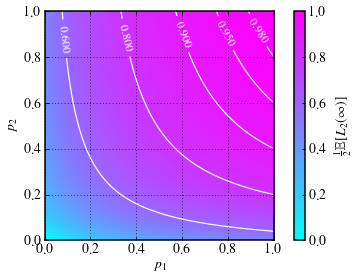

In [117]:
'''
M=2 links, with one link having probability q and the other link having probability p.
t_star1=5, t_star2=2, t->infinity.
'''

plt.imshow(C,cmap='cool',origin='lower',extent=[0,1,0,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\frac{1}{2}\mathbb{E}[L_2(\infty)]$',fontsize=14,labelpad=10)

CS=plt.contour(X,Y,C,[0.60,0.8,0.9,0.95,0.98],colors='white')
plt.clabel(CS, inline=1, fontsize=12)

plt.xlabel(r'$p_1$',fontsize=14)
plt.ylabel(r'$p_2$',fontsize=14)

#plt.title(r'$M=2$, $t_1^{\star}=5$, $t_2^{\star}=2$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('avg_num_links_uneven.pdf',bbox_inches='tight')


plt.show()

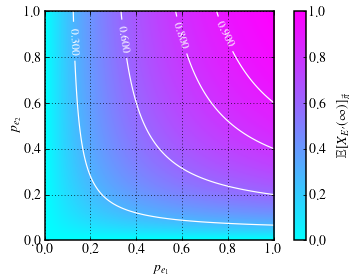

In [11]:
'''
M=2 links, with one link having probability q and the other link having probability p.
t_star1=5, t_star2=2, t->infinity.
'''

plt.imshow(D,cmap='cool',origin='lower',extent=[0,1,0,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\mathbb{E}[X_{E^\prime}(\infty)]_{\vec{\pi}}$',fontsize=14,labelpad=10)

CS=plt.contour(X,Y,D,[0.3,0.60,0.8,0.9],colors='white')
plt.clabel(CS, inline=1, fontsize=12)

plt.xlabel(r'$p_{e_1}$',fontsize=14)
plt.ylabel(r'$p_{e_2}$',fontsize=14)

#plt.title(r'$M=2$, $t_1^{\star}=5$, $t_2^{\star}=2$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('avg_link_prod_uneven.pdf',bbox_inches='tight')


plt.show()

In [13]:
C2=np.zeros((100,100))
D2=np.zeros((100,100))

t_star=[5,10,15,20]

t=50

i=0
j=0
for p in p_array:
    j=0
    for q in p_array:
        Pr=[p,q,p,q]
        C2[i][j]=L2(4,t,Pr,t_star)
        D2[i][j]=P2(4,t,Pr,t_star)
        j+=1
    i+=1
        

In [111]:
'''
M=4 links, with one link having probability q and the other link having probability p.
t_star=[5,10,15,20], t=50.
'''

plt.imshow(C2,cmap='cool',origin='lower',extent=[0,1,0,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\frac{1}{4}\mathbb{E}[L_4(50)]$',fontsize=14,labelpad=10)

CS=plt.contour(X,Y,C2,[0.60,0.8,0.9,0.95,0.98],colors='white')
plt.clabel(CS, inline=1, fontsize=12)

plt.xlabel(r'$p_1$',fontsize=14)
plt.ylabel(r'$p_2$',fontsize=14)

#plt.title(r'$M=2$, $t_1^{\star}=5$, $t_2^{\star}=2$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('avg_num_links_uneven2.pdf',bbox_inches='tight')


plt.show()

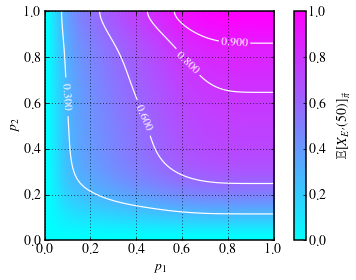

In [14]:
'''
M=4 links, with one link having probability q and the other link having probability p.
t_star=[5,10,15,20], t=50.
'''

plt.imshow(D2,cmap='cool',origin='lower',extent=[0,1,0,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\mathbb{E}[X_{E^{\prime}}(50)]_{\vec{\pi}}$',fontsize=14,labelpad=10)

CS=plt.contour(X,Y,D2,[0.3,0.60,0.8,0.9],colors='white')
plt.clabel(CS, inline=1, fontsize=12)

plt.xlabel(r'$p_1$',fontsize=14)
plt.ylabel(r'$p_2$',fontsize=14)

#plt.title(r'$M=2$, $t_1^{\star}=5$, $t_2^{\star}=2$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('avg_link_prod_uneven2.pdf',bbox_inches='tight')


plt.show()

In [95]:
C3=np.zeros((100,100))


t_star=[5,10,15,20]

i=0
j=0
for p in p_array:
    j=0
    for q in p_array:
        Pr=[p,q,p,q]
        C3[i][j]=L(4,Pr,t_star)
        j+=1
    i+=1

In [97]:
'''
M=4 links, with one link having probability q and the other link having probability p.
t_star=[5,10,15,20], t=50.
'''

plt.imshow(C3,cmap='cool',origin='lower',extent=[0,1,0,1])

cb=plt.colorbar()
cb.ax.tick_params(labelsize=12)
cb.set_label(r'$\frac{1}{4}\mathbb{E}[L_{\infty}]$',fontsize=12,labelpad=10)

CS=plt.contour(X,Y,C3,[0.60,0.8,0.9,0.95,0.98],colors='white')
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel(r'$p_1$',fontsize=12)
plt.ylabel(r'$p_2$',fontsize=12)

#plt.title(r'$M=2$, $t_1^{\star}=5$, $t_2^{\star}=2$',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.savefig('avg_num_links_uneven3.pdf',bbox_inches='tight')


plt.show()